In [1]:
using Flux, Statistics
using Flux.Data: DataLoader
using Flux: onehotbatch, onecold, @epochs
using Flux.Losses: logitcrossentropy
using Base: @kwdef
using MLDatasets
using Plots

In [2]:
include("network.jl")
include("vsa.jl")
include("spiking.jl")

train_to_phase (generic function with 2 methods)

In [3]:
model = Chain(PhasorDense(1024 => 256), )

Chain(
  PhasorDense(1024 => 256),             # 262_400 parameters
) 

In [4]:
x = random_symbols((100, 1024))

100×1024 Matrix{Float64}:
 -0.730364   -0.175542     0.725714    …  -0.963222   -0.786242   -0.0955269
  0.479765    0.699836    -0.553121        0.222637   -0.599838    0.508765
  0.54979    -0.690163    -0.568637        0.833213   -0.307546    0.825927
  0.851788    0.681592     0.801305        0.392518    0.64822     0.220563
  0.248604    0.0191786    0.222512        0.196146    0.144428   -0.782766
  0.948953   -0.0947148   -0.0421464   …  -0.248144   -0.280214   -0.463609
  0.674114    0.0201292   -0.872795       -0.780528   -0.949383   -0.442337
 -0.289025   -0.819238     0.593286        0.473492    0.614548    0.999271
 -0.87341    -0.650579    -0.402985        0.865918    0.609719   -0.176873
  0.641054   -0.893519     0.902602       -0.300388   -0.0964775  -0.272612
  0.566032   -0.136496     0.204832    …   0.754753    0.615941   -0.572857
 -0.185429    0.301139    -0.904523       -0.991308   -0.823278    0.751133
 -0.34527    -0.803083     0.00152612     -0.0393096  -0.5269

In [5]:
x |> size

(100, 1024)

In [6]:
y = model(x)

100×256 Matrix{Float64}:
  0.21731      0.121215   -0.0532393   …  -0.110171     0.161334
  0.0721449    0.629657   -0.489126        0.429293    -0.1212
  0.235345    -0.147439    0.00490063     -0.119756    -0.0270776
  0.23566     -0.280219   -0.297444       -0.0140112   -0.0478387
 -0.322996     0.227009   -0.161513        0.180774     0.379544
  0.17702      0.473815    0.0586517   …  -0.00318143   0.375384
  0.0702661    0.0465876   0.0208337      -0.226999     0.117277
  0.0342628    0.520547   -0.257398        0.386974     0.0609237
  0.254254    -0.657092   -0.286783       -0.260205    -0.353119
 -0.550009     0.0485632  -0.0632649      -0.249817    -0.395772
  0.204287     0.146904    0.607946    …  -0.141711    -0.558352
  0.245984    -0.6529     -0.121125        0.694026     0.0217532
 -0.330311     0.186322   -0.0141548      -0.424423     0.404784
  ⋮                                    ⋱                ⋮
  0.0149642   -0.130043    0.454441        0.329614    -0.00600576
  0

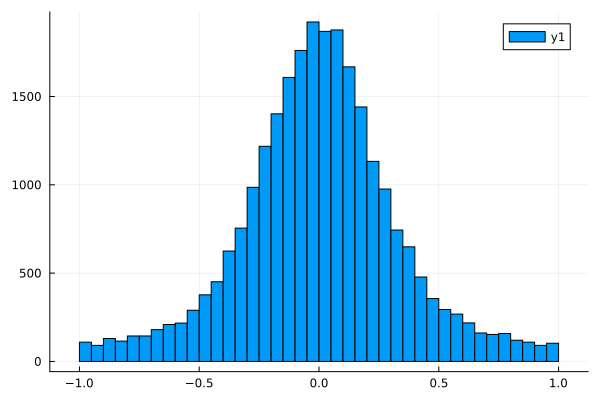

In [7]:
histogram(y |> vec)

In [8]:
sa = default_spk_args()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.03 (s)
Threshold: 0.02 (V)


In [9]:
xt = phase_to_train(x, sa, repeats = 5)

Spike Train: (100, 1024) with 512000 spikes.

In [10]:
call = SpikingCall(xt, sa, (0.0, 10.0))

SpikingCall(Spike Train: (100, 1024) with 512000 spikes., Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.03 (s)
Threshold: 0.02 (V)
, (0.0, 10.0))

In [13]:
y_spikes = model(call)

SpikingCall(Spike Train: (100, Base.OneTo(256)) with 253631 spikes., Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.03 (s)
Threshold: 0.02 (V)
, (0.0, 10.0))

In [14]:
minimum(y_spikes.train.times)

0.13999999999999999

In [15]:
y_spikes.train.offset

0.25

In [16]:
sa.t_period

1.0

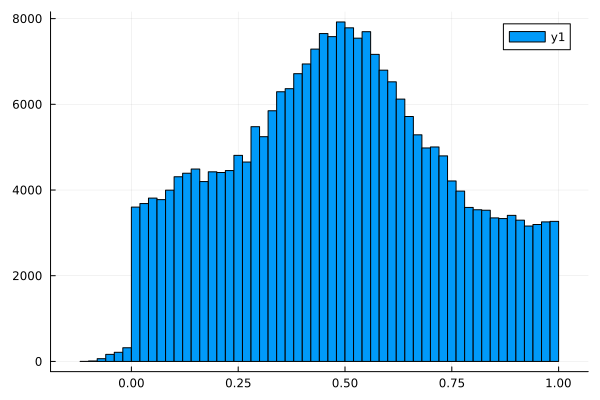

In [17]:
histogram((y_spikes.train.times .- y_spikes.train.offset) .% 1.0)


In [39]:
y_sphase = train_to_phase(y_spikes)

10×100×256 Array{Float64, 3}:
[:, :, 1] =
 0.14  0.1    -0.02    0.22  -0.26  …  NaN      0.02         -0.18   0.1
 0.26  0.1   NaN       0.42  -0.42      -0.98   0.02         -0.28   0.08
 0.32  0.1     0.76    0.5   -0.46       1.0    0.02         -0.32   0.06
 0.36  0.1     0.78  NaN     -0.5        0.98   0.02         -0.34   0.06
 0.38  0.12    0.8     0.52  -0.5        0.98   0.02         -0.36   0.04
 0.4   0.08    0.82    0.56  -0.52  …    0.98  -1.56319e-13  -0.36  -0.12
 0.4   0.08    0.82    0.56  -0.52       0.98  -1.98952e-13  -0.36  -0.12
 0.4   0.08    0.82    0.56  -0.52       0.96  -2.41585e-13  -0.36  -0.12
 0.4   0.08    0.82    0.56  -0.52       0.96  -2.84217e-13  -0.36  -0.12
 0.38  0.08    0.82    0.56  -0.54       0.96  -3.2685e-13   -0.36  -0.12

[:, :, 2] =
 0.1   -1.0   -0.04  -0.26  0.24    0.38  …  -0.02    0.44  0.98  8.88178e-16
 0.14   0.8   -0.18  -0.42  0.28  NaN        -0.88  NaN     0.62  0.06
 0.22   0.78  -0.28  -0.54  0.28    0.66     -0.9     0.6

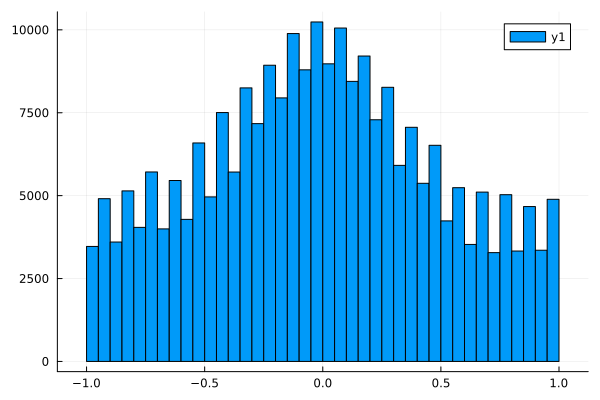

In [40]:
histogram(y_sphase |> vec)

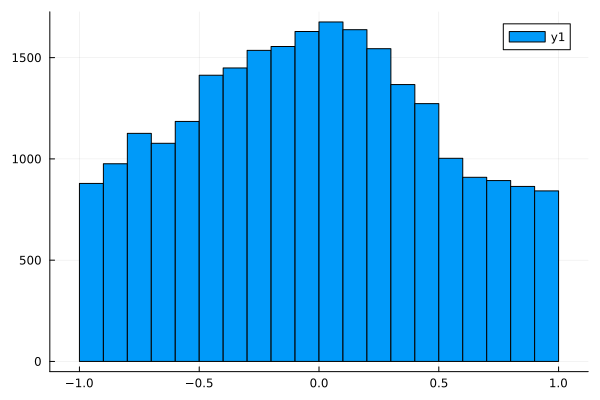

In [49]:
histogram(y_sphase[4,:,:] |> vec, bins=-1.0:0.1:1.0)

In [50]:
scatter(vec(y), vec(y_sphase[4,:,:]))

In [51]:
using Statistics: cor

In [52]:
function cor_realvals(x, y)
    is_real = x -> .!isnan.(x)
    x_real = is_real(x)
    y_real = is_real(y)
    reals = x_real .* y_real
    
    cor_val = cor(x[reals], y[reals])
    return cor_val
end


cor_realvals (generic function with 1 method)

In [53]:
cv = [cor_realvals(vec(y), vec(y_sphase[i,:,:])) for i in axes(y_sphase,1)]

10-element Vector{Float64}:
 0.5210370127522257
 0.7602797677720288
 0.8381470391930614
 0.8471897044854914
 0.8509727219482955
 0.824073134112659
 0.8207254266622975
 0.8186073089784126
 0.8183016437660412
 0.8173654301365703

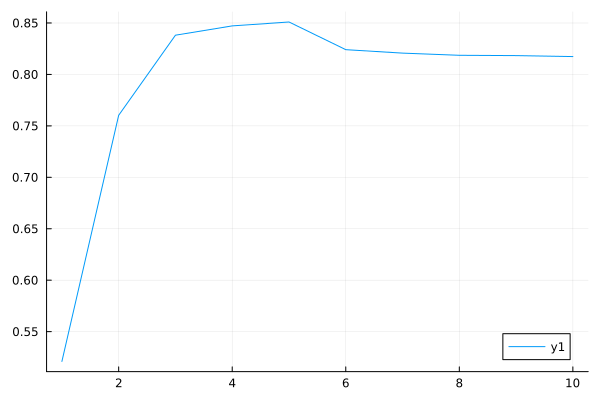

In [54]:
plot(cv)